In [43]:
#Import library
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import os

In [44]:
#function to hide password
def get_db_password_from_user():
    # Check if the password is already set as an environment variable
    db_password = os.environ.get("DB_PASSWORD")
    
    #If thats not the case, ask for user input
    if db_password is None:
        # Ask the user for the password if it's not set
        password = input("Enter your database password: ")
        os.environ["DB_PASSWORD"] = password  # Store the password as an environment variable
        return password
    else:
        return db_password

#Main connection to database
def connectDB():
    # Get the password from the user or environment variable
    db_password = get_db_password_from_user()

    #If password is correct run the connection
    try:
        # Attempt to establish the database connection
        conn = psycopg2.connect(
            host="localhost",
            database="Database_management_Group1",
            user="postgres",
            password=db_password)
        return conn
    
    #Throw exception if password is incorrect
    except psycopg2.OperationalError as e:
        # Display the error message in the console
        print(f"Connection failed: {e}")
        return None

#Database connection
db_connection = connectDB()

    #Succesful connection
if db_connection is not None:
        print("Database connection successful!")

        db_connection.close()
        #Unsuccesful connection
else:
        print("Unable to connect to the database. Please check your password.")

Database connection successful!


In [45]:
#Find genre_id with the highest average worldwide_box_office
#Written by Youssef
def find_genre_ID_worldwide(conn):
    dfCus = pd.read_sql("""-- H1.1 Find the genre_id with the highest average worldwide_box_office between 2000 and 2021
SELECT
    genre_id,
    AVG(worldwide_box_office) AS avg_box_office
FROM
    sales
WHERE
    CAST(release_year AS integer) BETWEEN 2000 AND 2021
GROUP BY
    genre_id
ORDER BY
    avg_box_office DESC
LIMIT 1;
""", conn)
    return dfCus
    
#Call the function connect to DB
conn = connectDB()
print("Connection succes.")

#Print output
dfCus = find_genre_ID_worldwide(conn)
print(dfCus)

#Close connection
conn.close()

print("Connection closed.")

Connection succes.
   genre_id  avg_box_office
0         9    7.982401e+07
Connection closed.


C:\Users\matth\AppData\Local\Temp\ipykernel_3228\3419450680.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfCus = pd.read_sql("""-- H1.1 Find the genre_id with the highest average worldwide_box_office between 2000 and 2021


In [46]:
#Calculate if the average worldwide box office of genre 9 is higher than others
#Written by Youssef
def significance_genre(conn):
    dfCus = pd.read_sql("""-- H1.2 Calculate average global box office revenue for action movies and other genres
SELECT
    AVG(CASE WHEN genre_id = '9' THEN worldwide_box_office ELSE 0 END) AS avg_adventure_revenue,
    AVG(CASE WHEN genre_id IN ('1', '2', '4', '5', '7', '8', '10', '13') THEN worldwide_box_office ELSE 0 END) AS avg_other_genre_revenue
FROM
    sales
WHERE
    CAST(release_year AS integer) BETWEEN 2010 AND 2020;  -- Adjust the date range as needed

-- Determine if the difference in average revenue is statistically significant
SELECT
    CASE
        WHEN avg_action_revenue > avg_other_genre_revenue THEN 'Action movies have higher average revenue.'
        WHEN avg_action_revenue < avg_other_genre_revenue THEN 'Other genres have higher average revenue.'
        ELSE 'There is no significant difference in average revenue.'
    END AS result
FROM
    (
        -- Subquery to calculate average revenue
        SELECT
            AVG(CASE WHEN genre_id = '9' THEN worldwide_box_office ELSE 0 END) AS avg_action_revenue,
            AVG(CASE WHEN genre_id IN ('1', '2', '4', '5', '7', '8', '10', '13') THEN worldwide_box_office ELSE 0 END) AS avg_other_genre_revenue
        FROM
            sales
        WHERE
            CAST(release_year AS integer) BETWEEN 2010 AND 2020  -- Adjust the date range as needed
    ) AS subquery;


""", conn)
    return dfCus
    
#Call the function connect to DB
conn = connectDB()
print("Connection succes.")

#Print output
dfCus = significance_genre(conn)
print(dfCus)

#Close connection
conn.close()

print("Connection closed.")

Connection succes.
                                      result
0  Other genres have higher average revenue.
Connection closed.


C:\Users\matth\AppData\Local\Temp\ipykernel_3228\4043030969.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfCus = pd.read_sql("""-- H1.2 Calculate average global box office revenue for action movies and other genres


C:\Users\matth\AppData\Local\Temp\ipykernel_3228\1579956061.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfCus = pd.read_sql("""-- H1.3 Calculate the average box office revenue per genre for multiple release years


Connection succes.
     genre_id release_year  average_box_office
0           1         2010        1.939548e+07
1           1         2011        1.224783e+07
2           1         2012        1.551410e+07
3           1         2013        1.132223e+07
4           1         2014        1.439384e+07
..        ...          ...                 ...
131        14         2020        8.198340e+05
132        15         2017        0.000000e+00
133        15         2020        1.217140e+06
134        16         2014        0.000000e+00
135        16         2015        3.433259e+07

[136 rows x 3 columns]


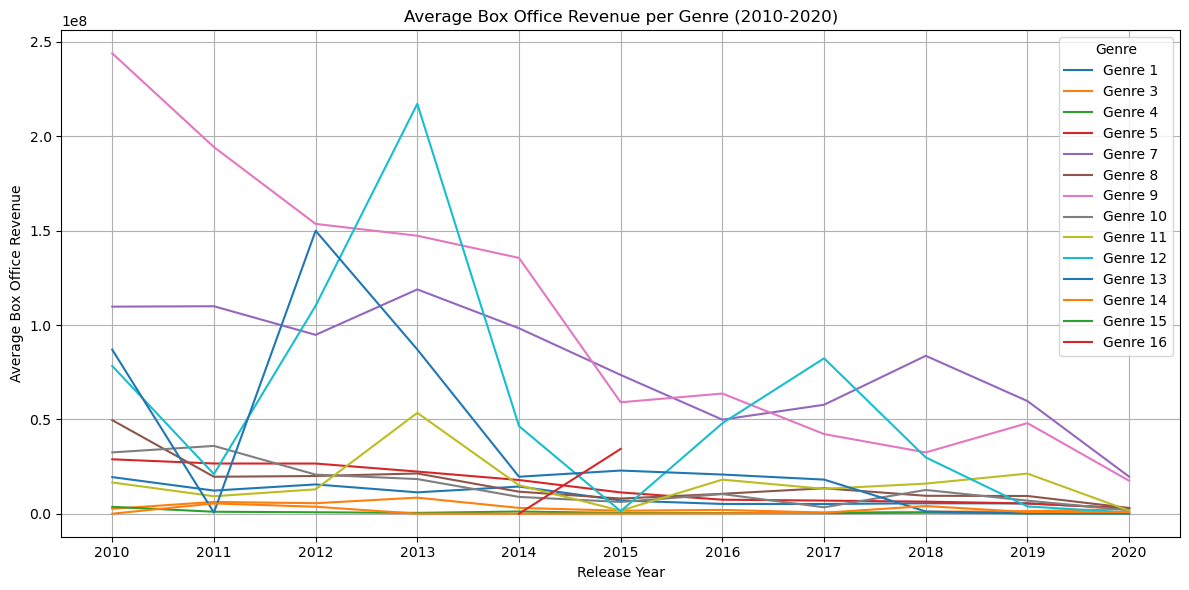

Connection closed.


In [47]:
#Calculate the average box office revenue per genre for multiple release years
#Written by Youssef
def average_box_office_year(conn):
    dfCus = pd.read_sql("""-- H1.3 Calculate the average box office revenue per genre for multiple release years
SELECT
    genre_id,
    release_year,
    AVG(worldwide_box_office) AS average_box_office
FROM
    sales
WHERE
    CAST(release_year AS integer) BETWEEN 2010 AND 2020  -- Specify the desired release years
GROUP BY
    genre_id, release_year
ORDER BY
    genre_id, release_year;

""", conn)
    return dfCus
    
#Call the function connect to DB
conn = connectDB()
print("Connection succes.")

#Print output
dfCus = average_box_office_year(conn)

print(dfCus)
# Pivot the DataFrame to have genres as columns and release years as the index
pivot_df = dfCus.pivot(index='release_year', columns='genre_id', values='average_box_office')

# Plotting the line chart
plt.figure(figsize=(12, 6))  # Create a new figure with a specified size (12 inches wide, 6 inches tall)

# Iterate through each genre column in the pivot DataFrame
for genre_id in pivot_df.columns:
    # Plot a line for the current genre
    plt.plot(pivot_df.index, pivot_df[genre_id], label=f'Genre {genre_id}')


# Customize the plot with titles and labels
plt.title('Average Box Office Revenue per Genre (2010-2020)')
plt.xlabel('Release Year')
plt.ylabel('Average Box Office Revenue')
plt.legend(title='Genre')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

#Close connection
conn.close()

print("Connection closed.")

In [48]:
#Runtime average per genre_id
#Written by Youssef
def runtime_per_genreID(conn):
    dfCus = pd.read_sql("""-- H2. Calculate runtime average per genre_ID
     SELECT
    s.genre_id,
    AVG(m.runtime) AS avg_runtime
FROM
        meta AS m
    INNER JOIN
        sales AS s ON m.short_url = s.short_url
GROUP BY
	s.genre_id
ORDER BY
    avg_runtime DESC;

""", conn)
    return dfCus


#Call the function connect to DB
conn = connectDB()
print("Connection succes.")

#Print output
dfCus = runtime_per_genreID(conn)
print(dfCus)

#Close connection
conn.close()

print("Connection closed.")

Connection succes.
    genre_id  avg_runtime
0         12   113.107692
1         14   112.400000
2          7   110.835206
3         13   110.320000
4          1   104.684288
5          9   101.307071
6         11   100.158730
7         10    97.986301
8          8    95.818557
9          5    95.387684
10         3    93.620499
11         4    91.730828
Connection closed.


C:\Users\matth\AppData\Local\Temp\ipykernel_3228\1149345205.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfCus = pd.read_sql("""-- H2. Calculate runtime average per genre_ID


Connection succes.


C:\Users\matth\AppData\Local\Temp\ipykernel_3228\121552582.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfCus = pd.read_sql("""WITH MovieSales AS (


   avg_1_3days_worldwide_box_office  general_avg_worldwide_box_office
0                      1.466797e+08                      1.820390e+07


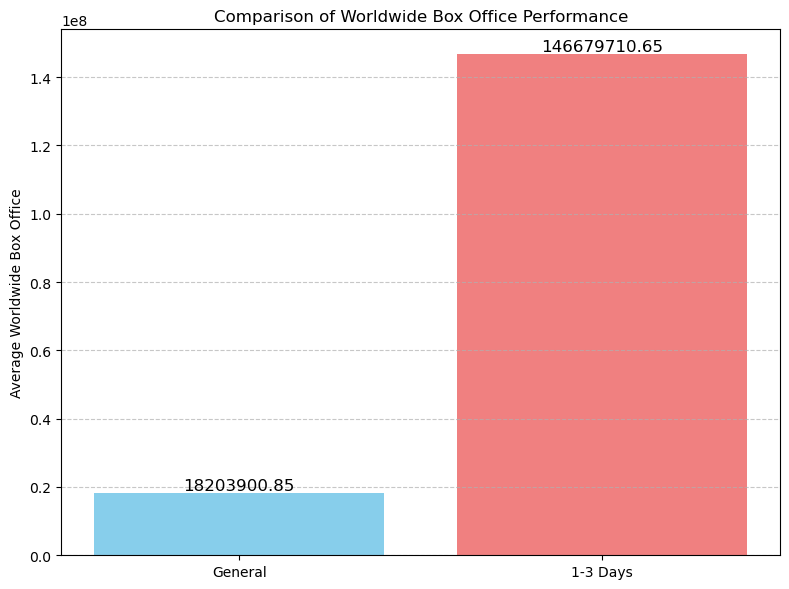

Connection closed.


In [49]:
#Average worldwide box office 1 to 3 days after release compared to general
#Written by Ziya
def average_worldwide_1_to_3_days(conn):
    dfCus = pd.read_sql("""WITH MovieSales AS (
    SELECT
        s.release_year,
        s.worldwide_box_office,
        s.production_budget,
        s.Avg_run_per_theatre,
        m.release_date,
        m.short_url 
    FROM
        sales s
    INNER JOIN
        meta m ON s.short_url = m.short_url
),
AdjacentMovies1_3 AS (
    SELECT
        ms.release_date,
        ms.short_url,  
        ms.production_budget,
        ms.worldwide_box_office
	    
    FROM
        MovieSales ms
    INNER JOIN
        meta m ON ms.release_date > m.release_date
            AND ms.release_date - INTERVAL '3 days' <= m.release_date AND ms.release_date - INTERVAL '1 day' > m.release_date
            AND ms.short_url != m.short_url
    WHERE
        ms.production_budget > 5352385.72
)
SELECT
    AVG(am.worldwide_box_office) AS avg_1_3days_worldwide_box_office,
    (SELECT AVG(worldwide_box_office) FROM sales) AS general_avg_worldwide_box_office
FROM
    AdjacentMovies1_3 am;

   
""", conn)
    return dfCus


#Call the function connect to DB
conn = connectDB()
print("Connection succes.")

#Print output
dfCus = average_worldwide_1_to_3_days(conn)
print(dfCus)

# Extract the average worldwide box office values
avg_1_3days_worldwide_box_office = dfCus['avg_1_3days_worldwide_box_office'].values[0]
general_avg_worldwide_box_office = dfCus['general_avg_worldwide_box_office'].values[0]

# Create a bar chart to compare general and 1-3 days performance
categories = ['General', '1-3 Days']
values = [general_avg_worldwide_box_office, avg_1_3days_worldwide_box_office]

# Define colors for the bars
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=colors)
for i, v in enumerate(values):
    plt.text(i, v + 10, f'{v:.2f}', ha='center', va='bottom', fontsize=12)

plt.title('Comparison of Worldwide Box Office Performance')
plt.ylabel('Average Worldwide Box Office')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

#Close connection
conn.close()

print("Connection closed.")

Connection succes.


C:\Users\matth\AppData\Local\Temp\ipykernel_3228\4070799622.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfCus = pd.read_sql(""" WITH MovieSales AS (


   avg_4_7days_worldwide_box_office  general_avg_worldwide_box_office
0                      1.405343e+08                      1.820390e+07


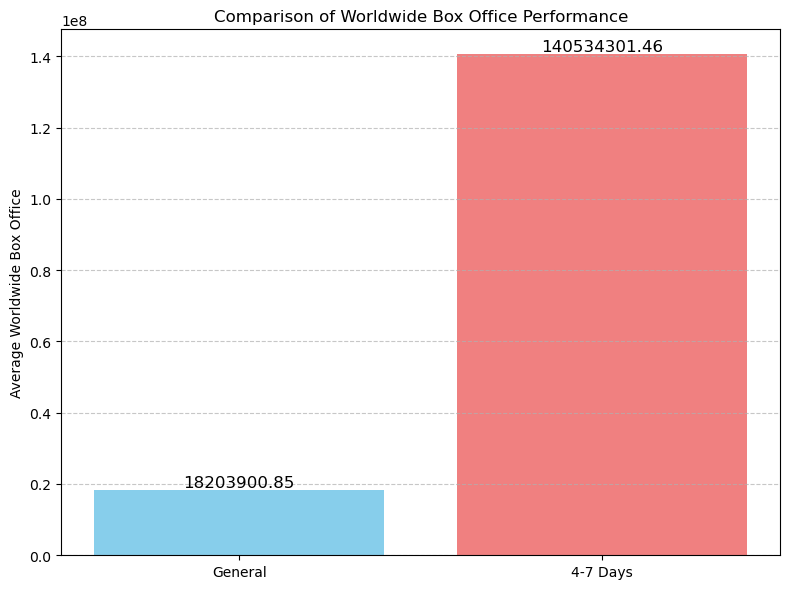

Connection closed.


In [50]:
#Average worldwide box office 4 to 7 days after release compared to general
#Written by Ziya
def average_worldwide_4_to_7_days(conn):
    dfCus = pd.read_sql(""" WITH MovieSales AS (
    SELECT
        s.release_year,
        s.worldwide_box_office,
        s.production_budget,
        s.Avg_run_per_theatre,
        m.release_date,
        m.short_url 
    FROM
        sales s
    INNER JOIN
        meta m ON s.short_url = m.short_url
),
AdjacentMovies4_7 AS (
    SELECT
        ms.release_date,
        ms.short_url,  
        ms.production_budget,
        ms.worldwide_box_office
	    
    FROM
        MovieSales ms
    INNER JOIN
        meta m ON ms.release_date > m.release_date
            AND ms.release_date - INTERVAL '7 days' <= m.release_date AND ms.release_date - INTERVAL '4 day' > m.release_date
            AND ms.short_url != m.short_url
    WHERE
        ms.production_budget > 5352385.72
)
SELECT
    AVG(am.worldwide_box_office) AS avg_4_7days_worldwide_box_office,
    (SELECT AVG(worldwide_box_office) FROM sales) AS general_avg_worldwide_box_office
FROM
    AdjacentMovies4_7 am;

""", conn)
    return dfCus


#Call the function connect to DB
conn = connectDB()
print("Connection succes.")

#Print output
dfCus = average_worldwide_4_to_7_days(conn)
print(dfCus)

# Extract the average worldwide box office values
avg_4_7days_worldwide_box_office = dfCus['avg_4_7days_worldwide_box_office'].values[0]
general_avg_worldwide_box_office = dfCus['general_avg_worldwide_box_office'].values[0]

# Create a bar chart to compare general and 4-7 days performance
categories = ['General', '4-7 Days']
values = [general_avg_worldwide_box_office, avg_4_7days_worldwide_box_office]

# Define colors for the bars
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=colors)
for i, v in enumerate(values):
    plt.text(i, v + 10, f'{v:.2f}', ha='center', va='bottom', fontsize=12)

plt.title('Comparison of Worldwide Box Office Performance')
plt.ylabel('Average Worldwide Box Office')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

#Close connection
conn.close()

print("Connection closed.")

In [51]:
#Average run per theatre 1 to 3 days after release compared to general
#Written by Ziya
def average_per_theatre_1_to_3_days(conn):
    dfCus = pd.read_sql("""WITH MovieSales AS (
    SELECT
        s.release_year,
        s.worldwide_box_office,
        s.production_budget,
        s.Avg_run_per_theatre,
        m.release_date,
        m.short_url 
    FROM
        sales s
    INNER JOIN
        meta m ON s.short_url = m.short_url
),
AdjacentMovies1_3 AS (
    SELECT
        ms.release_date,
        ms.short_url,  
        ms.production_budget,
        ms.Avg_run_per_theatre
	    
    FROM
        MovieSales ms
    INNER JOIN
        meta m ON ms.release_date > m.release_date
            AND ms.release_date - INTERVAL '3 days' <= m.release_date AND ms.release_date - INTERVAL '1 day' > m.release_date
            AND ms.short_url != m.short_url
    WHERE
        ms.production_budget > 18203900.847284578

)
SELECT
    AVG(am.Avg_run_per_theatre) AS avg_1_3days_avg_run_per_theatre,
	(SELECT AVG(Avg_run_per_theatre) FROM sales) AS general_avg_run_per_theatre

FROM
    AdjacentMovies1_3 am;
	

""", conn)
    return dfCus


#Call the function connect to DB
conn = connectDB()
print("Connection succes.")

#Print output
dfCus = average_per_theatre_1_to_3_days(conn)
print(dfCus)

# Calculate the difference in averages
difference_in_averages = dfCus['avg_1_3days_avg_run_per_theatre'] - dfCus['general_avg_run_per_theatre']

# Print the result
print("Difference in Averages:", difference_in_averages.mean())

#Close connection
conn.close()

print("Connection closed.")

Connection succes.


C:\Users\matth\AppData\Local\Temp\ipykernel_3228\1554810727.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfCus = pd.read_sql("""WITH MovieSales AS (


   avg_1_3days_avg_run_per_theatre  general_avg_run_per_theatre
0                         5.012252                     1.514801
Difference in Averages: 3.497451477258398
Connection closed.


In [52]:
#Average run per theatre 4 to 7 days after release compared to general
#Written by Ziya
def average_per_theatre_4_to_7_days(conn):
    dfCus = pd.read_sql("""WITH MovieSales AS (
    SELECT
        s.release_year,
        s.worldwide_box_office,
        s.production_budget,
        s.Avg_run_per_theatre,
        m.release_date,
        m.short_url 
    FROM
        sales s
    INNER JOIN
        meta m ON s.short_url = m.short_url
),
AdjacentMovies4_7 AS (
    SELECT
        ms.release_date,
        ms.short_url,  
        ms.production_budget,
        ms.Avg_run_per_theatre
	    
    FROM
        MovieSales ms
    INNER JOIN
        meta m ON ms.release_date > m.release_date
            AND ms.release_date - INTERVAL '7 days' <= m.release_date AND ms.release_date - INTERVAL '4 day' > m.release_date
            AND ms.short_url != m.short_url
    WHERE
        ms.production_budget > 18203900.847284578

)
SELECT
    AVG(am.Avg_run_per_theatre) AS avg_4_7days_Avg_run_per_theatre,
	(SELECT AVG(Avg_run_per_theatre) FROM sales) AS general_Avg_run_per_theatre

FROM
    AdjacentMovies4_7 am;

""", conn)
    return dfCus


#Call the function connect to DB
conn = connectDB()
print("Connection succes.")

dfCus = average_per_theatre_4_to_7_days(conn)
print(dfCus)

# Calculate the difference in averages
difference_in_averages = dfCus['avg_4_7days_avg_run_per_theatre'] - dfCus['general_avg_run_per_theatre']

# Print the result
print("Difference in Averages:", difference_in_averages.mean())

#Close connection
conn.close()

print("Connection closed.")

Connection succes.


C:\Users\matth\AppData\Local\Temp\ipykernel_3228\3330771206.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfCus = pd.read_sql("""WITH MovieSales AS (


   avg_4_7days_avg_run_per_theatre  general_avg_run_per_theatre
0                         4.961909                     1.514801
Difference in Averages: 3.447108335044546
Connection closed.


In [53]:
#Impact of Domestic Sales >= $20,000,000 on International and Worldwide Sales
#Written by Amin
def impact_of_domestic_sales(conn):
    dfCus = pd.read_sql("""-- Hypothesis 1: Impact of Domestic Sales >= $20,000,000 on International and Worldwide Sales
WITH HighDomesticSales AS (
    SELECT
        title,
        domestic_box_office,
        international_box_office,
        worldwide_box_office,
        (international_box_office / domestic_box_office) AS intl_to_dom_ratio,
        (worldwide_box_office / domestic_box_office) AS world_to_dom_ratio
    FROM
        sales
    WHERE
        domestic_box_office >= 20000000
        AND international_box_office > 0  -- Only include rows with positive international sales
)

-- Query to analyze the impact and calculate average ratios
SELECT
    AVG(intl_to_dom_ratio) AS avg_intl_to_dom_ratio,
    AVG(world_to_dom_ratio) AS avg_world_to_dom_ratio
FROM
    HighDomesticSales;
""", conn)
    return dfCus


#Call the function connect to DB
conn = connectDB()
print("Connection succes.")

#Print output
dfCus = impact_of_domestic_sales(conn)
print(dfCus)


#Close connection
conn.close()

print("Connection closed.")

Connection succes.
   avg_intl_to_dom_ratio  avg_world_to_dom_ratio
0               1.159355                2.159355
Connection closed.


C:\Users\matth\AppData\Local\Temp\ipykernel_3228\4096581608.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfCus = pd.read_sql("""-- Hypothesis 1: Impact of Domestic Sales >= $20,000,000 on International and Worldwide Sales


Connection succes.
                         title  dom_to_world_ratio release_year
0       A Quiet Place: Part II           54.005146         2021
1                  Black Widow           48.360989         2021
2                     Candyman           79.056717         2021
3     Clifford the Big Red Dog           62.337340         2021
4                      Cruella           37.948917         2021
...                        ...                 ...          ...
1925                     U-571           60.398035         2000
1926  Urban Legends: Final Cut           55.655637         2000
1927           What Women Want           48.864640         2000
1928        Where the Heart Is           82.646785         2000
1929                     X-Men           52.985638         2000

[1930 rows x 3 columns]


C:\Users\matth\AppData\Local\Temp\ipykernel_3228\2136239013.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfCus = pd.read_sql("""-- Hypothesis 2: Impact of Increasing Domestic-to-Worldwide Ratio on International on Movies Released between 2000 and 2021 (Excluding Movies with < $20,000,000 Domestic Sales)


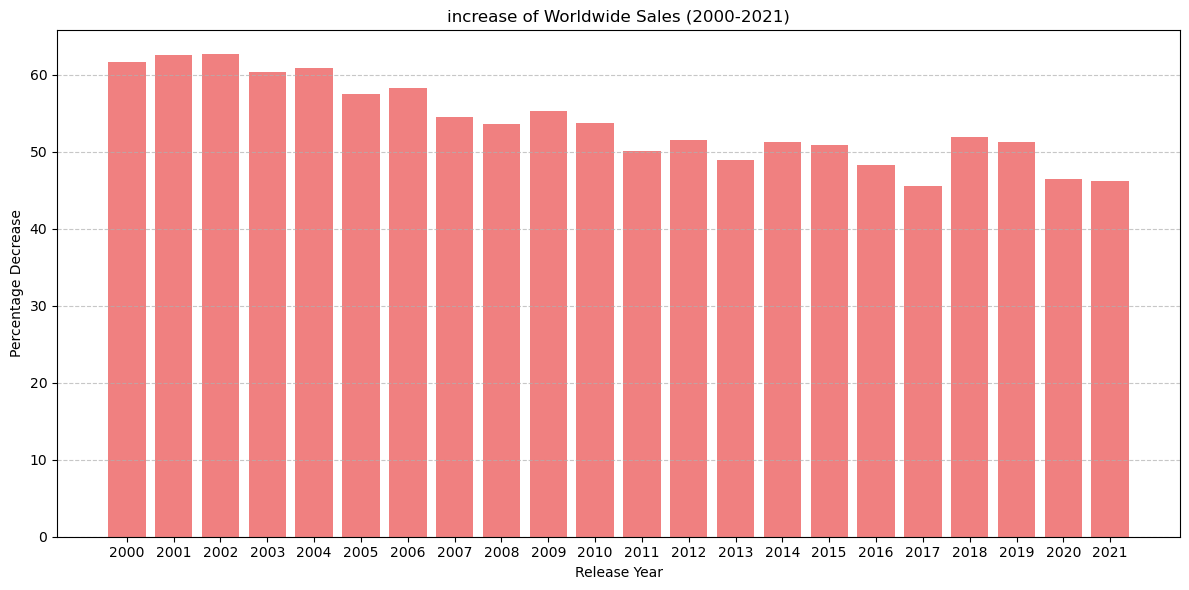

Connection closed.


In [54]:
#Impact of Increasing Domestic-to-Worldwide Ratio on International on Movies
#Written by Amin
def impact_of__increasing_dom_to_ww(conn):
    dfCus = pd.read_sql("""-- Hypothesis 2: Impact of Increasing Domestic-to-Worldwide Ratio on International on Movies Released between 2000 and 2021 (Excluding Movies with < $20,000,000 Domestic Sales)
WITH DomesticAndWorldwide AS (
    SELECT
        title,
        domestic_box_office,
        international_box_office,
        (domestic_box_office / worldwide_box_office) * 100 AS dom_to_world_ratio,
	    release_year
    FROM
        sales
    WHERE
        domestic_box_office >= 20000000
        AND international_box_office > 0  -- Only include movies with both domestic and International sales
        AND cast(release_year as integer) BETWEEN 2000 AND 2021  -- Filter by release year
)

-- Query to analyze the impact and calculate the correlation
SELECT
    title,
    dom_to_world_ratio,
	release_year
FROM
    DomesticAndWorldwide
GROUP BY
    title,
	release_year,
	dom_to_world_ratio
ORDER BY
    release_year DESC;  -- Sort in descending order
""", conn)
    return dfCus


#Call the function connect to DB
conn = connectDB()
print("Connection succes.")

#Print output
dfCus = impact_of__increasing_dom_to_ww(conn)
print(dfCus)

# Extract data for plotting
worldwide_sales = dfCus.groupby('release_year')['dom_to_world_ratio'].mean().reset_index()
release_years = worldwide_sales['release_year']
worldwide_sales_values = worldwide_sales['dom_to_world_ratio']

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(release_years, worldwide_sales_values, color='lightcoral')
plt.title('increase of Worldwide Sales (2000-2021)')
plt.xlabel('Release Year')
plt.ylabel('Percentage Decrease')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

#Close connection
conn.close()

print("Connection closed.")


Connection successful.


C:\Users\matth\AppData\Local\Temp\ipykernel_3228\3810266999.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfCus = pd.read_sql("""-- Calculate box office metrics for "R" rated movies


  movie_rating  avg_domestic_box_office  avg_international_box_office  \
0           PG             5.402791e+07                  7.539280e+07   
1        PG-13             4.737305e+07                  6.540109e+07   
2            R             1.459151e+07                  1.658446e+07   

   avg_worldwide_box_office  avg_runtime_per_theatre  
0              1.288874e+08                 4.956884  
1              1.121425e+08                 4.389936  
2              3.089017e+07                 3.634928  


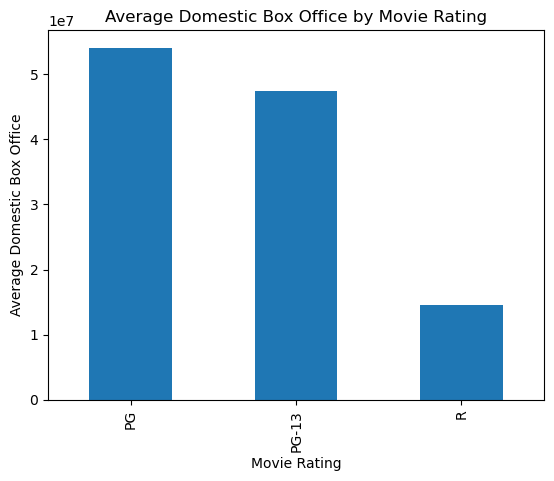

Connection closed.


In [55]:
#Calculate box office for R, NON-PG and PG
#Written by Matthijs
def calculate_PG_NON_PG_PG(conn):
    dfCus = pd.read_sql("""-- Calculate box office metrics for "R" rated movies
WITH R_BoxOffice AS (
    SELECT
        m.rating,
        s.domestic_box_office,
        s.international_box_office,
        s.worldwide_box_office,
        s.avg_run_per_theatre
    FROM
        meta AS m
    LEFT JOIN
        sales AS s ON m.short_url = s.short_url
    WHERE
        m.rating = '| R'
),


-- Calculate box office metrics for "PG-13" movies
PG_13_BoxOffice AS (
    SELECT
        m.rating,
        s.domestic_box_office,
        s.international_box_office,
        s.worldwide_box_office,
        s.avg_run_per_theatre
    FROM
        meta AS m
    LEFT JOIN
        sales AS s ON m.short_url = s.short_url
    WHERE
        m.rating = '| PG-13'
),

-- Calculate box office metrics for "PG" rated movies
PG_BoxOffice AS (
    SELECT
        m.rating,
        s.domestic_box_office,
        s.international_box_office,
        s.worldwide_box_office,
        s.avg_run_per_theatre
    FROM
        meta AS m
    LEFT JOIN
        sales AS s ON m.short_url = s.short_url
    WHERE
        m.rating = '| PG'
)

-- Combine the results for comparison
SELECT
    'R' AS movie_rating,
    AVG(domestic_box_office) AS avg_domestic_box_office,
    AVG(international_box_office) AS avg_international_box_office,
    AVG(worldwide_box_office) AS avg_worldwide_box_office,
    AVG(avg_run_per_theatre) AS avg_runtime_per_theatre
FROM
    R_BoxOffice
UNION ALL
SELECT
    'PG-13' AS movie_rating,
    AVG(domestic_box_office) AS avg_domestic_box_office,
    AVG(international_box_office) AS avg_international_box_office,
    AVG(worldwide_box_office) AS avg_worldwide_box_office,
    AVG(avg_run_per_theatre) AS avg_runtime_per_theatre
FROM
    PG_13_BoxOffice
UNION ALL
SELECT
    'PG' AS movie_rating,
    AVG(domestic_box_office) AS avg_domestic_box_office,
    AVG(international_box_office) AS avg_international_box_office,
    AVG(worldwide_box_office) AS avg_worldwide_box_office,
    AVG(avg_run_per_theatre) AS avg_runtime_per_theatre
FROM
    PG_BoxOffice;
 
""", conn)
    return dfCus


#Call the function connect to DB
conn = connectDB()
print("Connection successful.")

# Call the s4_h1_compareRating function to fetch data
dfCus = calculate_PG_NON_PG_PG(conn)

# Print the fetched data to check the data
print(dfCus)

# Plot a bar chart to make the statistic
dfCus.plot(kind='bar', x='movie_rating', y='avg_domestic_box_office', legend=False)

# Customizing the barchart
plt.title('Average Domestic Box Office by Movie Rating')
plt.xlabel('Movie Rating')
plt.ylabel('Average Domestic Box Office')

# Show the barchart
plt.show()

# Close the database connection
conn.close()
print("Connection closed.")

Connection succes.
   movie_rating            genre  avg_domestic_box_office  \
0            PG                0             3.792031e+05   
1            PG           Action             1.220085e+08   
2            PG        Adventure             1.042631e+08   
3            PG     Black Comedy             2.272792e+07   
4            PG           Comedy             3.566972e+07   
5            PG      Documentary             1.448624e+06   
6            PG            Drama             2.103514e+07   
7            PG           Horror             3.199917e+07   
8            PG          Musical             6.108387e+07   
9            PG  Romantic Comedy             3.508829e+07   
10           PG          Western             5.448821e+07   
11       Non-PG        Adventure             9.779920e+07   
12       Non-PG          Musical             3.996578e+07   
13       Non-PG           Comedy             2.140323e+07   
14       Non-PG  Romantic Comedy             2.379731e+07   
15   

C:\Users\matth\AppData\Local\Temp\ipykernel_3228\1591737866.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfCus = pd.read_sql("""-- Calculate box office metrics for PG-rated movies by genre


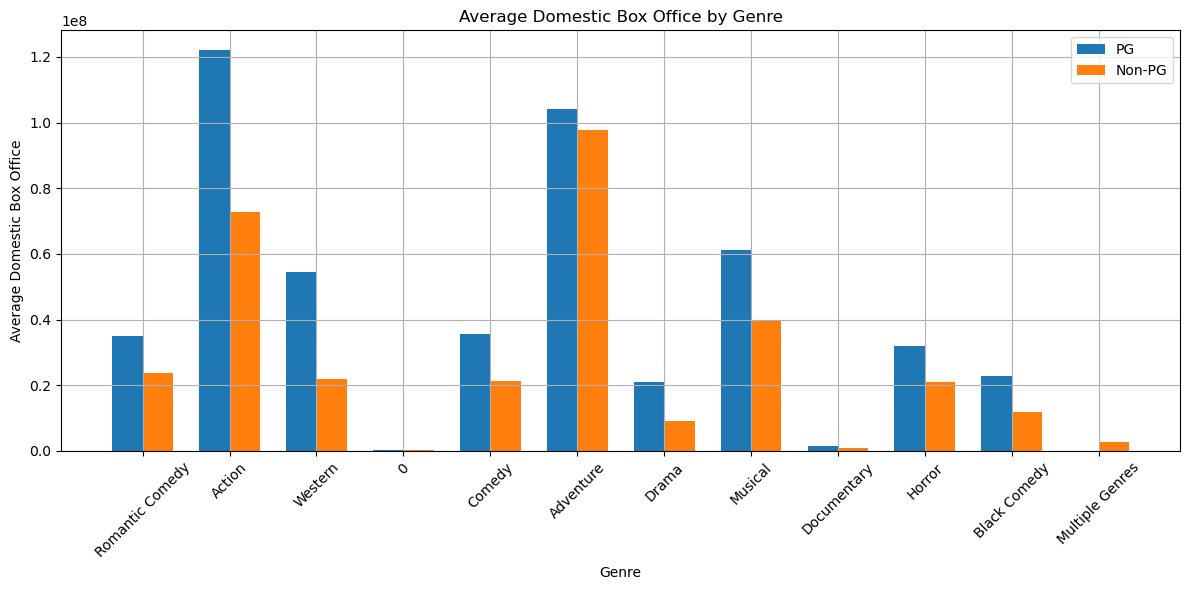

In [56]:
#Calculate the box office metrics for PG-rated movies by genre and the box office metrics for non-PG-rated movies by genre
#Written by Matthijs
def calculate_PG_compared_to_NON_PG(conn):
    dfCus = pd.read_sql("""-- Calculate box office metrics for PG-rated movies by genre
WITH PG_Genre_BoxOffice AS (
    SELECT distinct
        m.rating,
        m.runtime,
        g.genre_id,
        g.genre AS genre_name,
        s.domestic_box_office,
        s.international_box_office,
        s.worldwide_box_office,
        s.avg_run_per_theatre
    FROM
        meta AS m
    INNER JOIN
        sales AS s ON m.short_url = s.short_url
    INNER JOIN
        genre AS g ON s.genre_id = g.genre_ID
    WHERE
        LEFT(REPLACE(m.rating, '| ', ''), 2) = 'PG'
),

-- Calculate box office metrics for non-PG-rated movies by genre
Non_PG_Genre_BoxOffice AS (
    SELECT
        m.rating,
        m.runtime,
        g.genre_id,
        g.genre AS genre_name,
        s.domestic_box_office,
        s.international_box_office,
        s.worldwide_box_office,
        s.avg_run_per_theatre
    FROM
        meta AS m
    INNER JOIN
        sales AS s ON m.short_url = s.short_url
    INNER JOIN
        genre AS g ON s.genre_id = g.genre_ID
    WHERE
        m.rating <> 'PG'
)

-- Combine the results for comparison
SELECT
    'PG' AS movie_rating,
    genre_name AS genre,
    AVG(domestic_box_office) AS avg_domestic_box_office,
    AVG(international_box_office) AS avg_international_box_office,
    AVG(worldwide_box_office) AS avg_worldwide_box_office,
    AVG(avg_run_per_theatre) AS avg_runtime_per_theatre
FROM
    PG_Genre_BoxOffice
GROUP BY
    genre_name

UNION ALL

SELECT
    'Non-PG' AS movie_rating,
    genre_name AS genre,
    AVG(domestic_box_office) AS avg_domestic_box_office,
    AVG(international_box_office) AS avg_international_box_office,
    AVG(worldwide_box_office) AS avg_worldwide_box_office,
    AVG(avg_run_per_theatre) AS avg_runtime_per_theatre
FROM
    Non_PG_Genre_BoxOffice
GROUP BY
    genre_name;

""", conn)
    return dfCus


#Call the function connect to DB
conn = connectDB()
print("Connection succes.")

dfCus = calculate_PG_compared_to_NON_PG(conn)
print(dfCus)

#Close connection
conn.close()

print("Connection closed.")

# Filter the DataFrame to include all genres
all_genres = dfCus['genre'].unique()

# Separate data for PG and Non-PG movies
df_PG = dfCus[dfCus['movie_rating'] == 'PG']
df_non_PG = dfCus[dfCus['movie_rating'] == 'Non-PG']

# Get a list of all unique genres from both DataFrames
all_genres = list(set(df_PG['genre']) | set(df_non_PG['genre']))

# Reindex both DataFrames to include all genres and fill missing values with 0
df_PG = df_PG.set_index('genre').reindex(all_genres, fill_value=0).reset_index()
df_non_PG = df_non_PG.set_index('genre').reindex(all_genres, fill_value=0).reset_index()

# Create a bar chart comparing PG vs. Non-PG movies by genre
plt.figure(figsize=(12, 6))  # Set the figure size

# Calculate the width for bars
bar_width = 0.35

# Define the x-axis positions for bars
x = range(len(all_genres))

# Plot PG-rated movies
plt.bar(x, df_PG['avg_domestic_box_office'], width=bar_width, label='PG', align='center')

# Plot Non-PG-rated movies
plt.bar([i + bar_width for i in x], df_non_PG['avg_domestic_box_office'], width=bar_width, label='Non-PG', align='center')

# Customize the plot with titles and labels
plt.title('Average Domestic Box Office by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Domestic Box Office')
plt.xticks([i + bar_width / 2 for i in x], all_genres, rotation=45)  # Set x-axis labels and rotate for readability
plt.legend()

# Show the plot
plt.grid(True)  # Add a grid for better visualization
plt.tight_layout()  # Adjust layout for better spacing
plt.show()